*Logistic Regression* is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is > 50% , then the model predicts that the instance belongs to that class (called positive class , labelled '1') or else it predicts that it does not (it belongs to negative class, labelled '0'). This makes it binary classifier

### Estimating Probabilities

like Linear Regression model Logistic Regression computes weighted sum of  input features(plus the bias), but instead of outputting the result like Linear Regression model does , it ouputs *logistic* of this result

Logistic Regression model estimated probability(vectorized form)

$\hat p = h_\theta(X) = \sigma(\theta^T X)$

The logistic ($\sigma$) is a *sigmoid* that outputs a number between 0 and 1 

*Logistic function*

$\sigma(t) = \frac{1}{1+ e^{(-t)}}$

Once the Logistic Regression model has estimated the probabiliy $\hat p = h_\theta(X)$ , it makes prediction accordingly

*Logistic Regression  model  prediction*

$\hat y = \begin {cases} 0 &if&  \hat p  < 0.5 \\ 1 &if& \hat p \ge 0.5 \end {cases}$

$\sigma(t) < 0.5 $ when $t < 0$ and $\sigma(t) \ge 0.5 $ when $t \ge 0$, so a Logistic Regression modle predicts 1 if $X^T\theta$ is positive and $0$ if it is negative

#### Note:

 The score $t$ is often called the $logit$: this name comes from the fact that the logit function, defined as $ logit(p) = log(\frac{p}{1-p})$, is the inverse of the logistic function. Indeed , if you compute the logit of the estimated probability  p, you will find that the result is t. The logit is also called the $log-odds$, since it is the log of the ratio between the estimated probability of the positive class and the estimated probability of the nagative class

### Training and Cost Function

The objective of training a Logistic Regression model is to set parameter vector $\theta$ so that the model estimates high probabilities for positive instances and low probabilities for negative instances. 

*Cost function of a single training instance*

$c(\theta) = \begin{cases} -log(\hat p) &if y = 1 \\ -log(1-\hat p) &if y = 0 \end{cases}$

- $-log(t)$ grows  very large when $t$ approaches $0$ 
so the cost will be large if the model estimates a probability close to $0$ 
 ,it will also very large if the model estimates a probability close to 1 for a negative instance.
 
- $-log(t)$ is close to $0$ when $t$ is close to $1$, so the cost will be close to $0$ if the estimated probability is close to $0$ for a negative instance or close to $1$ for a postive instance

The cost function over the whole training set is simply the average cost over all training instances.

*Logistic Regression cost function(log loss)*

$ J(\theta)$= $-\frac{1}{m} \sum_{i = 1}^m\begin{bmatrix} y^{(i)}log\left(\hat p^{(i)}\right) + \left(1 - y^{(i)}\right)log\left(1-\hat p^{(i)} \right) \end{bmatrix} $



- There is no closed form equation to compute the value of $\theta$ that minimizes the cost function

- The cost function is convex, so Gradient Descent (or any other optimization algorithtm ) is guaranteed to find the global minimum


*Logistic Regression cost function partial derivative*

$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i = 1}^m\left( \sigma\ \left (\theta^T X \right) -y^{(i)} \right) x_j^{(i)}$



### Decision Boundaries

Let's use the iris dataset to illustrate Logistic Regression. This is a dataset that conatains the sepal and petal length and width of 150 iris flowers of three different species:Iris-Setosa, Iris-Veriscolor, and Iris-Virginica

In [1]:
# building a classifier to detect the iris-virginica type based only on the petal width feature
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:] #petal width column
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-virginica ,else 0


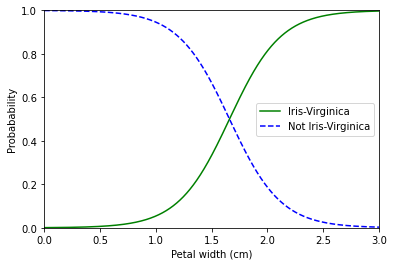

In [2]:
# training a Logisitic regression model on iris
%matplotlib inline
import matplotlib.pyplot  as plt
from sklearn.linear_model import LogisticRegression

log_reg =  LogisticRegression()
log_reg.fit(X,y)

# let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0,3,1000).reshape(-1,1) #-1 means unspecified:the value is inferred from the length of the array and the remaining dimension
y_proba =  log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0],"b--", label="Not Iris-Virginica")
plt.ylabel("Probabability")
plt.xlabel("Petal width (cm)")
plt.axis([0,3,0,1])
plt.legend()
plt.show()

The petal width of Iris-virignica ranges fro 1.4 to 2.5 cms, while other iris flowers have a smaller petal.

In [3]:
# predicting 
log_reg.predict([[1.6], [2]]) #returns the class which is most likely


array([0, 1])

Here, there is a *decision boundary* at around 1.6cm where both probabilites are 50%; if the petal width is higher than 1.6, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not

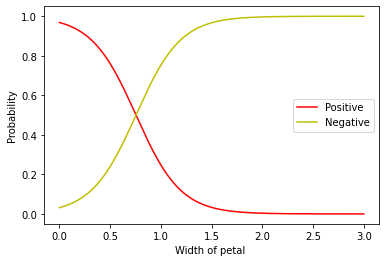

In [4]:
import sklearn.datasets 

iris_data = datasets.load_iris()
list(iris_data.keys())
x = iris["data"][:,-1:]
y = (iris["target"] == 0).astype(np.int)

log_reg.fit(x,y)
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:,1], 'r-',label="Positive")
plt.plot(x_new, y_proba[:,0], 'y-', label='Negative')
plt.ylabel("Probability")
plt.xlabel("Width of petal ")
plt.legend()


In [5]:
log_reg.predict([[0.6],[ 1.6]])

array([1, 0])

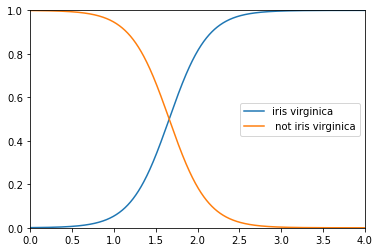

In [6]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris_data = datasets.load_iris()
X = iris_data['data'][:,3:]
y = (iris_data['target'] == 2).astype(np.int)
log_model = LogisticRegression()
log_model.fit(X,y)
x_new = np.linspace(0,4,1000).reshape(-1,1)
y_proba = log_model.predict_proba(x_new)
plt.plot(x_new,y_proba[:,1], label="iris virginica")
plt.plot(x_new,y_proba[:,0], label=" not iris virginica")
plt.axis([0,4,0,1])
plt.legend()

###  Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is $Softmax    Regression$ or $Multinomial  Logistic Regression$

- when given an instance **x**, the Softmax Regression model first computes a score $s_k$(**x**) for each class $k$



- then estimates the probability of each class by applying the *softmax function* (also called the *normalized exponential*) to the scores

*Equation for softmax score for class k*

$s_k$(**x**) $ = $ **x** $^T\theta^{(k)}$



- Each class has its own dedicated parameter vector $\theta^{(k)}$


- All these vectors are stored as row in a *parameter matrix* $\Theta$

Once you have computed the score of every class for the instance **x**, you can estimate the probability $\hat P_k$ that the instance belongs to class $k$ by running the scores through the softmax function, it computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials) 

*Softmax function*

$\hat P_k = \sigma (S(X))_k = \frac{exp\left(S_k(X) \right)}{\sum_{j = 1}^K exp \left(S_j(X) \right)}$


- $K$ is the number of classes


- $S(X)$ is a vector containing the scores of each class for the instance $X$


- $\sigma(S(X))_k$ is the estimated probability that the instance $X$ belongs to the  class $k$ given the scores of each class for that instance


Like Logistic Regression classifier, Softmax Regression classifier predicts the class with the highest estimated probability(the class with the highest score)


*Softmax Regression classifier prediction*

$\hat y = \underset{k}{\operatorname{argmax}} \sigma(S(X))_k = \underset{k}{\operatorname{argmax}} S_k(X) = \underset{k}{\operatorname{argmax}}\left( \left(\theta^{(k)} \right)^T X \right)$

- The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$that maximizes the estimated probability $\sigma\left(S(X)\right)_k$


##### Note:

   The Softmax Regression classifier predicts only one class at a time so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture
   


- To train the model, the objective is to have a model that estimates a high probability for the target class(Low probability for the other classes).To Minimize the cost function of softmax regression classifier  cross entropy is used , which should lead to this objective because it penalize the model when it estimates a low probability for a target class


- Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes 


*Cross entropy cost function*

$J(\Theta) = -\frac{1}{m}\sum_{i = 1}^m \sum_{k = 1}^K y_k^{(i)}log\left(\hat p^{(i)}_k\right)$

- $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$

When there are just two classes $(K = 2)$, this cost function is equivalent to the Logistic Regression's cost function.


*Cross entropy gradient vector for class k:*

$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m}\sum_{i = 1}^m \left(\hat P_k^{(i)} - y_k^{(i)}\right)x^{(i)}$

In [11]:
# iris flowers classification using softmax

X = iris['data'][:,(2,3)] # petal length , petal, width
y = iris['target']
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

"""
Logistic Regression uses one-versus-all by default
when you train it on more than two class , thats why here
multi_class="multinomial" which switches to softmax.
"lbfgs" is the solver that supports softmax
It also applies l2 regularization(ridge) by default
, can control it using 'C' hyperparamter
"""

softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]]) # 5cm long and 2 cm wide return iris virginica (class2)


array([2])

In [13]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

###  Cross entropy 
(optional)

Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the whether every day. If there are eight options(sunny, rainy etc..),you could encode each option using 3 bits since $2^3 = 8$. However, if you think it will be sunny almost every day , it would be much more efficient to code "sunny" on just one bit (0) and the other seven options on  4 bits(starting with 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the whether is perfect, cross entropy will just be equal to the entropy of the weather itself(i.e., its intrinsic unpredictability).But if your assumptions are wrong , cross entropy will be greater by an amount called the *Kullback-Leibler divergence*.

The cross entropy between two probability distributions p and q is defined as 

$H(p,q)= - \sum_x p(x)log q(x)$ (when the distributions are discrete)